Reference: 

- https://github.com/robbievanleeuwen/concrete-properties
- https://numpy.org/

Import first the libraries 

```python
!pip install concreteproperties
```

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 3.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of cytriangle to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/80.8 kB ? eta -:--:--
   ---------------------------------------- 80.8/80.8 kB 4.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/501.8 kB ? eta -:--:--
   ----------------------------- ---------- 368.6/501.8 kB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 501.8/501.8 kB 6.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.6/7.8 MB 11.5 MB/s eta 0:00:01
   ---- ----------------------------------- 0.9/7.8 MB 9.4 MB/s eta 0:00:01
   ------- -------------------------------- 1.4/7.8 MB 10.0 MB/s eta 0:00:01
   --------- ----------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.


## Import the necessary Modules
```python
import numpy as np
from sectionproperties.pre.library import concrete_rectangular_section

from concreteproperties import (
    Concrete,
    ConcreteLinear,
    ConcreteSection,
    RectangularStressBlock,
    SteelBar,
    SteelElasticPlastic,
)
from concreteproperties.results import MomentInteractionResults
```

## Materical Assignment
reference : https://concrete-properties.readthedocs.io/en/stable/user_guide/materials.html
```python
concrete = Concrete(
    name="32 MPa Concrete",
    density=2.4e-6,
    stress_strain_profile=ConcreteLinear(elastic_modulus=30.1e3),
    ultimate_stress_strain_profile=RectangularStressBlock(
        compressive_strength=32,
        alpha=0.802,
        gamma=0.89,
        ultimate_strain=0.003,
    ),
    flexural_tensile_strength=3.4,
    colour="lightgrey",
)

steel = SteelBar(
    name="500 MPa Steel",
    density=7.85e-6,
    stress_strain_profile=SteelElasticPlastic(
        yield_strength=500,
        elastic_modulus=200e3,
        fracture_strain=0.05,
    ),
    colour="grey",
)
```

## Create Geometry and Concrete Section
reference: 
- https://concrete-properties.readthedocs.io/en/stable/user_guide/geometry.html
- https://concrete-properties.readthedocs.io/en/stable/user_guide/analysis.html
```python
geom = concrete_rectangular_section(
    b=400,
    d=600,
    dia_top=25,
    area_top=310,
    n_top=3,
    c_top=30,
    dia_bot=24,
    area_bot=450,
    n_bot=3,
    c_bot=30,
    conc_mat=concrete,
    steel_mat=steel,
)

conc_sec = ConcreteSection(geom)
conc_sec.plot_section()
```

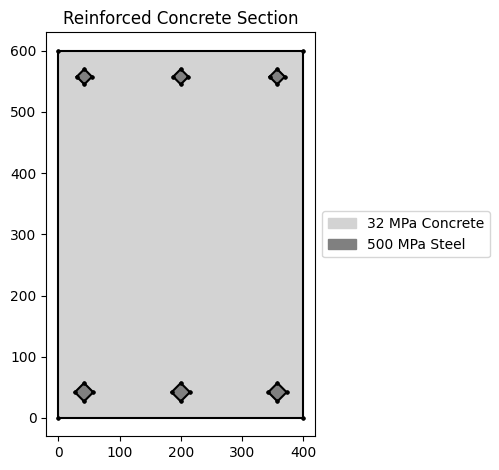

<Axes: title={'center': 'Reinforced Concrete Section'}>

```python
mi_res = conc_sec.moment_interaction_diagram(progress_bar=False)
mi_res.plot_diagram()
```

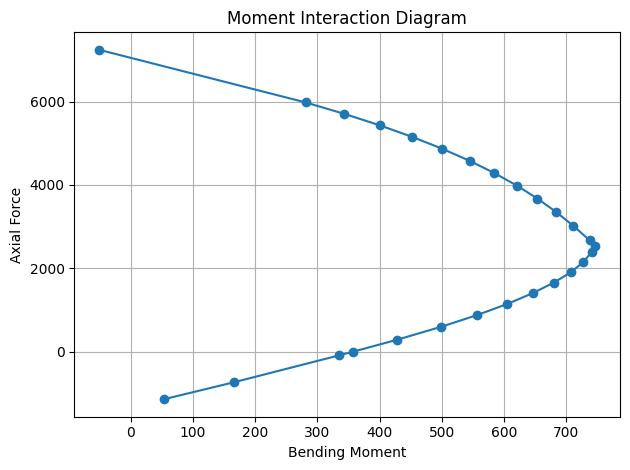

<Axes: title={'center': 'Moment Interaction Diagram'}, xlabel='Bending Moment', ylabel='Axial Force'>